In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv('titanic_dataset/train.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1, inplace=True)

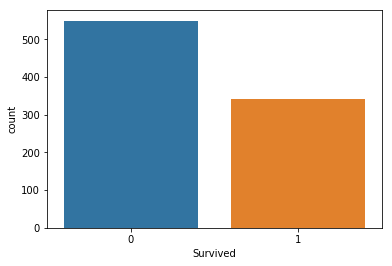

In [131]:
sns.countplot(x='Survived', data=df)

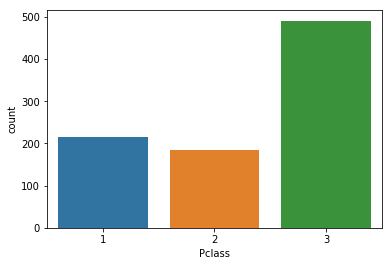

In [132]:
sns.countplot(x='Pclass', data=df)

In [133]:
df.dropna(inplace=True)

C:\Users\gemin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


29.64209269662921

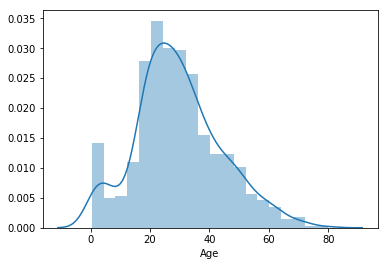

In [136]:
sns.distplot(df['Age'])
df['Age'].mean()

In [107]:
df_survivors_by_class = df.groupby('Pclass')['Survived'].count()
df_survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
df_survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()

In [108]:
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [109]:
d = df[df['Pclass'] == 3]
d.count()

Survived    355
Pclass      355
Sex         355
Age         355
SibSp       355
Parch       355
Fare        355
Embarked    355
dtype: int64

In [110]:
df.groupby('Survived')['Pclass'].count()

Survived
0    424
1    288
Name: Pclass, dtype: int64

(0, 891)

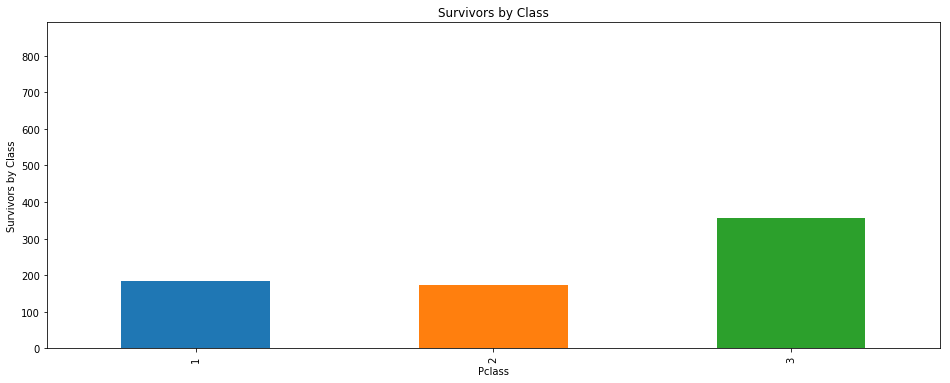

In [111]:
fig, (axis1) = plt.subplots(1, 1, figsize=(16,6))

ax = df_survivors_by_class.plot.bar(ax=axis1, title='Survivors by Class', sharey=True)
ax.set_ylabel('Survivors by Class')
ax.set_ylim(0,891)

(0.0, 1.0)

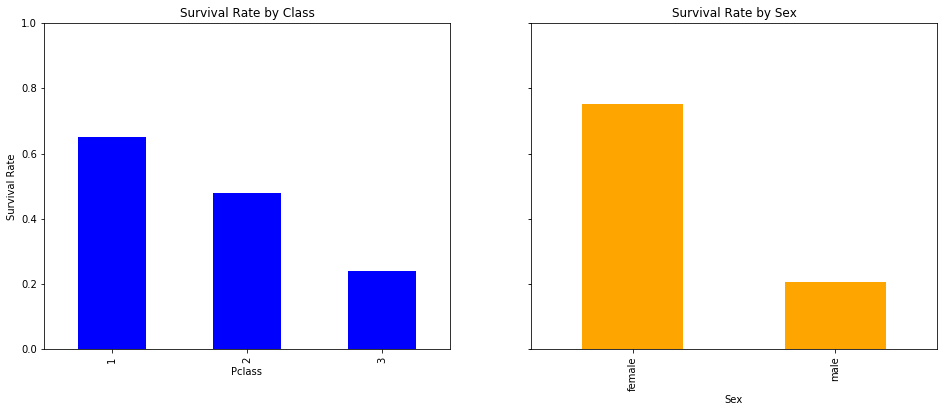

In [112]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(16,6))

ax = df_survival_rate_by_class.plot.bar(ax=axis1, color='blue', title='Survival Rate by Class', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0, 1.0)
ax = df_survival_rate_by_sex.plot.bar(ax=axis2, color='orange', title='Survival Rate by Sex', sharey=True)
ax.set_ylim(0.0, 1.0)

(0.0, 1.0)

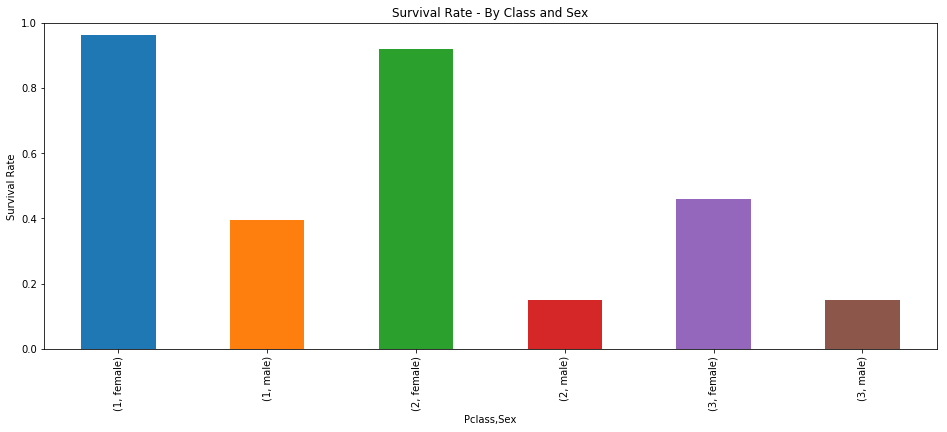

In [113]:
df_survival_rate_by_class_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
fig, (axis1) = plt.subplots(1, 1, figsize=(16,6))

ax = df_survival_rate_by_class_sex.plot.bar(ax=axis1, title='Survival Rate - By Class and Sex', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0, 1.0)

In [115]:
survived_score = df[df['Survived']==1]
survived_score = survived_score['Pclass'].astype('category')
not_survived_score = df[df['Survived']==0]
not_survived_score = not_survived_score['Pclass'].astype('category')

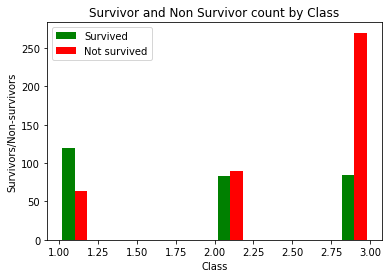

In [116]:
plt.hist([survived_score, not_survived_score], color=['green', 'red'])
plt.xlabel("Class")
plt.ylabel("Survivors/Non-survivors")
plt.legend(['Survived', 'Not survived'])
plt.title('Survivor and Non Survivor count by Class')
plt.show()

In [ ]:
sns.distplot()